# Flight (2008) Database
## by Bakir Alkurdi

## Preliminary Wrangling

This document explores a dataset containing flight details took place in 2008 1.9 million flights.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
flights = pd.read_csv('DelayedFlights.csv', index_col=False)
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
flights.duplicated().sum()

2

In [5]:
flights.drop_duplicates(inplace=True)

In [6]:
df = flights.copy()
df.drop(df.columns.difference(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirTime',
                               'DepDelay', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'Cancelled',
                               'CancellationCode']), 1, inplace=True)

In [7]:
df['TotalDelay'] = df['ArrDelay'] + df['DepDelay']

In [8]:
df['TotalDelay'] = df['TotalDelay'].replace('NaN', 0)

In [9]:
delay_level = []
for i in df['TotalDelay']:
    if i <= 10:
        delay_level.append('low')
    elif i > 10 and i <= 35:
        delay_level.append('medium')
    else:
        delay_level.append('high')

In [10]:
df['delay_level'] = delay_level

In [11]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,TotalDelay,delay_level
0,2008,1,3,4,WN,116.0,-14.0,8.0,IAD,TPA,810,0,N,-6.0,low
1,2008,1,3,4,WN,113.0,2.0,19.0,IAD,TPA,810,0,N,21.0,medium
2,2008,1,3,4,WN,76.0,14.0,8.0,IND,BWI,515,0,N,22.0,medium
3,2008,1,3,4,WN,77.0,34.0,34.0,IND,BWI,515,0,N,68.0,high
4,2008,1,3,4,WN,87.0,11.0,25.0,IND,JAX,688,0,N,36.0,high
5,2008,1,3,4,WN,230.0,57.0,67.0,IND,LAS,1591,0,N,124.0,high
6,2008,1,3,4,WN,106.0,1.0,6.0,IND,MCO,828,0,N,7.0,low
7,2008,1,3,4,WN,107.0,80.0,94.0,IND,MCO,828,0,N,174.0,high
8,2008,1,3,4,WN,37.0,11.0,9.0,IND,MDW,162,0,N,20.0,medium
9,2008,1,3,4,WN,213.0,15.0,27.0,IND,PHX,1489,0,N,42.0,high


In [12]:
ordinal_var_dict = {'CancellationCode' : ['A','B','C','D'],
                    'Cancelled' : [1,0],
                    'delay_level' : ['low','medium','high']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [13]:
df.Cancelled.dtype

CategoricalDtype(categories=[1, 0], ordered=True)

In [14]:
df.CancellationCode.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D'], ordered=True)

In [15]:
df.delay_level.dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

In [16]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1936756, 15)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
UniqueCarrier         object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
Cancelled           category
CancellationCode    category
TotalDelay           float64
delay_level         category
dtype: object
   Year  Month  DayofMonth  DayOfWeek UniqueCarrier  AirTime  ArrDelay  \
0  2008      1           3          4            WN    116.0     -14.0   
1  2008      1           3          4            WN    113.0       2.0   
2  2008      1           3          4            WN     76.0      14.0   
3  2008      1           3          4            WN     77.0      34.0   
4  2008      1           3          4            WN     87.0      11.0   
5  2008      1           3          4            WN    230.0      57.0   
6  2008      1     

In [17]:
print(df.describe())

            Year         Month    DayofMonth     DayOfWeek       AirTime  \
count  1936756.0  1.936756e+06  1.936756e+06  1.936756e+06  1.928369e+06   
mean      2008.0  6.111111e+00  1.575346e+01  3.984827e+00  1.082772e+02   
std          0.0  3.482546e+00  8.776268e+00  1.995967e+00  6.864264e+01   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  5.800000e+01   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  9.000000e+01   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.370000e+02   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  1.091000e+03   

           ArrDelay      DepDelay      Distance    TotalDelay  
count  1.928369e+06  1.936756e+06  1.936756e+06  1.928369e+06  
mean   4.219988e+01  4.318517e+01  7.656863e+02  8.529157e+01  
std    5.678474e+01  5.340253e+01  5.744799e+02  1.087493e+02  
min   -1.090000e+02  6.000000e+00  1.100000e+01 -9.000000e+

In [18]:
print(df.CancellationCode.value_counts())
print(df.Cancelled.value_counts())
print(df.delay_level.value_counts())

B    307
A    246
C     80
D      0
Name: CancellationCode, dtype: int64
0    1936123
1        633
Name: Cancelled, dtype: int64
high      1175050
medium     555462
low        206244
Name: delay_level, dtype: int64


### What is the structure of your dataset?

There are 1,936,758 flights in 2008 in the dataset with 15 features ('Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirTime','DepDelay', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'Cancelled','CancellationCode', 'Diverted', 'CarrierDelay'). Most variables are numeric in nature, but the variables CancellationCode and Cancelled are nominal categorical factor variable with the following Categories.

CancellationCode: A = carrier, B = weather, C = NAS, D = security <br>
Cancelled: 1 = yes, 0 = no

Also feature engineering was done to calculate our main interest which is TotalDelay in minutes which equal to arrival delay plus departure arrival, also the delay level was divided into 3 categories in 'delay_level' column and this variable is ordinal categorical factor variable with the following Categories:

Delay >= 10 min : 'low'<br>
10 min < Delay <= 35 min : 'medium'<br>
35 min < Delay : 'high'<br>

the medium level was chosen up to 35 minutes [travelsupermarket](https://www.travelsupermarket.com/en-gb/blog/travel-advice/how-long-before-a-flight-should-i-get-to-the-airport/) minutes because boarding gates can close between 30 and 40 minutes before scheduled departure time.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are reason for the cancelation and delaying of flights in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Expect that the month will have the strongest effect on each delay or cancelation: in winter the probability of weather cancelation rises and so on. I also think that the other factors like but not limited to origin, carrier, and Distance will have effects on the price, though to a much smaller degree than the main effect of month.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: distribution of delayed and flight.

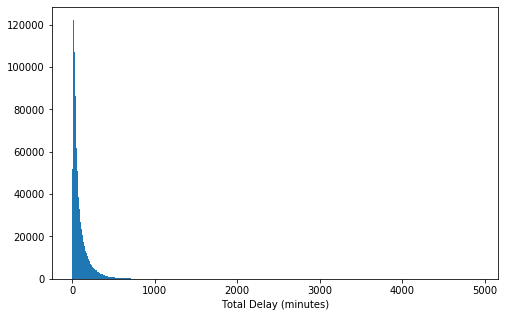

In [19]:
binsize = 5
bins = np.arange(0, df['TotalDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalDelay', bins = bins)
plt.xlabel('Total Delay (minutes)')
plt.show()

In [20]:
np.log10(df.TotalDelay.describe())

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    6.285190
mean     1.930906
std      2.036426
min           NaN
25%      1.342423
50%      1.690196
75%      2.033424
max      3.691965
Name: TotalDelay, dtype: float64

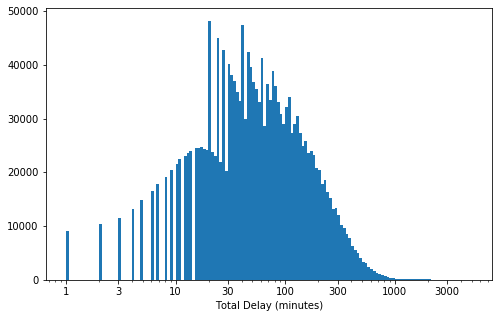

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['Distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalDelay', bins = bins)
plt.xscale('log')
x_ticks = [1,3,10,30,100,300,1000,3000]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Total Delay (minutes)')
plt.show()

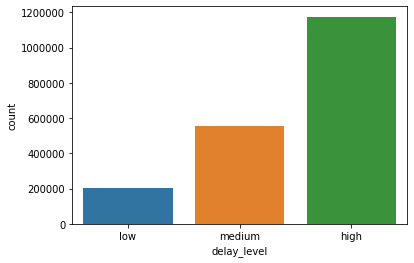

In [22]:
sb.countplot(data = df, x = 'delay_level');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

TotalDelay: this feature has a long-tailed distribution, with a lot of delayed flights on the low minutes end, and few on the high minutes end. A log scale is a need.

delay_level: this feature shows clearly that the most delays lies in the 'high' followed by 'medium' then 'low' delay level.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When plotted on a log-scale, the TotalDelay distribution looks roughly normal with peak at around 30. Interestingly, the data increase smothly from 1 to around 20 followed by smooth drop till 30 then steep jump.

## Bivariate Exploration

In this section I will find out the relationship between:<br>
`1.`In which months the most cancelation are.<br>
`2.`The delay level and the carrier.<br>
`3.`The delay level and the origin.

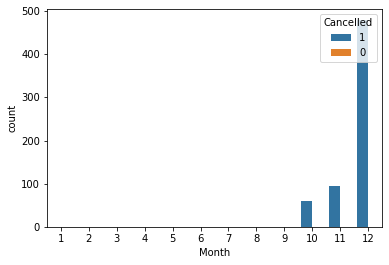

In [23]:
df_c = df[df['Cancelled'] == 1]
months = np.arange(1,12+1,1)
sb.countplot(data = df_c, x = 'Month', hue = 'Cancelled', order=months);

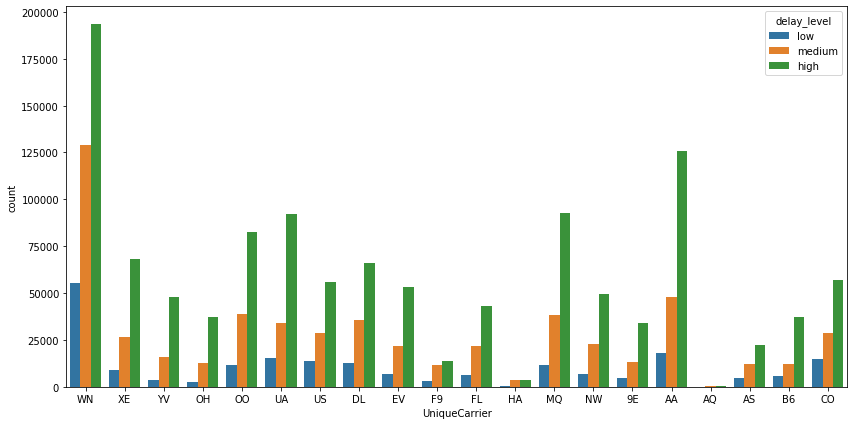

In [24]:
# order = df.UniqueCarrier.value_counts().index
plt.figure(figsize=(14,7))
sb.countplot(data = df, x = 'UniqueCarrier', hue = 'delay_level');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the relationship between canceled flight and months it is clearly that all canceled flight flights happened in October, November and December and most of them in December which is the beggining of winter season.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From the relationship between delay level and the carrier it is clearly that the there is no relation ship between delay level and carrier because all carriers tend to have delay level from largest to smallest 'high', 'medium', 'low' respectively as its is in the over all statistics which is shown in Univariate section.


## Multivariate Exploration

In this section I will try to find out if the TotalDelay has a relationship with both Month of the year and Distance of the flight.

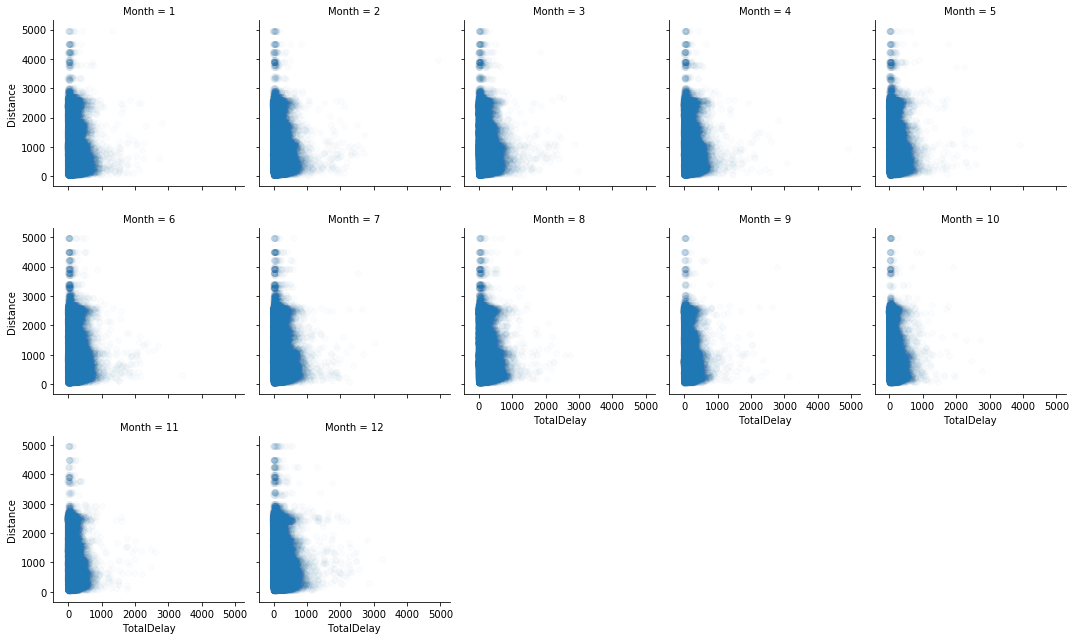

In [27]:
order = np.arange(1,13,1)
g = sb.FacetGrid(data = df, col = 'Month', height = 3, col_wrap=5, margin_titles = True, col_order=order)
g.map(plt.scatter, 'TotalDelay', 'Distance', alpha=1/70);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This relationship shows that the relationship between TotalDelay and Distance varies slightly along the year for example November or month 11 is less likely to have delays as in December or month 12.

Also May, June, July and August is more likely to be delayed than the rest of the year because it is summer and there is a lot of flights which is applicable in December because it is christmas and people travel a lot.

December has a higher posibility of very high Totaldelay than other months

In [28]:
df.to_csv('Final_Data.csv')